(pvt-esc-equilibrium)=
# Определение равновесного состояния системы

В предыдущих разделах были представлены особенности проверки [стабильности фазового состояния системы](SEC-1-Stability.md), а также получено [уравнение Речфорда-Райса](SEC-2-RR.md) и рассмотрены численные методы его решения для [двухфазной](SEC-3-RR-2P.md) и [многофазной](SEC-4-RR-NP.md) систем. Данный раздел посвящен расчету равновесного фазового состояния, проводимому в том случае, если по результатам анализа стабильности текущее фазовое состояние оказалось нестабильным. Как и в случае анализа стабильности, расчет равновесного состояния также имеет различные формулировки ([PT-термодинамика](#pvt-esc-equilibrium-pt), [VT-термодинамика](#pvt-esc-equilibrium-vt)).

(pvt-esc-equilibrium-pt)=
## PT-термодинамика

Задача поиска равновесного состояния многокомпонентной ($N_c$ – количество компонентов) многофазной ($N_p$ – количество фаз) системы для фиксированных давления $P$, температуры $T$, количеств вещества компонентов в системе $n_i, \; i = 1 \, \ldots \, N_c$ достаточно хорошо изучена и проработана. [Ранее](../1-TD/TD-14-PhaseEquilibrium.md) было показано, что равновесное состояние характеризуется минимумом энергии Гиббса. При этом, необходимым условием равновесного состояния является равенство химических потенциалов (или летучестей) соответствующих компонентов в фазах. Это условие определяет положение стационарных точек функции энергии Гиббса, [называемых](SEC-1-Stability.md) стационарными состояниями системы.

В результате решения задачи поиска равновесного состояния системы требуется определить количества вещества компонентов в фазах, всего $N_c \times \left( N_p - 1 \right)$ неизвестных с учетом ограничения $\sum_{j=1}^{N_p} n_i^j = n_i$, соответствующих положению минимума функции энергии Гиббса. Существует два основных направления решения данной задачи. Первое направление включает широкую группу подходов, основанных на ***методе последовательных подстановок*** *(successive (direct) substitution method)*. Данный метод, по сути, эквивалентен [методу градиентного спуска](https://en.wikipedia.org/wiki/Gradient_descent) с длиной шага, равной единице, с точки зрения минимизации энергии Гиббса. Преимуществом данного метода является его относительная простота, поскольку нет необходимости в расчете многомерных матриц и вторых частных производных функции энергии Гиббса. Недостатком данного метода является необходимость сравнительно большого количества итераций для нахождения решения, при этом, данный метод может сходиться к стационарным точкам функции. Метод последовательных подстановок подробно представлен в работах \[[Michelsen, 1982b](https://doi.org/10.1016/0378-3812(82)85002-4); [Heidemann, 1983](https://doi.org/10.1016/0378-3812(83)80115-0); [Mehra et al, 1983](https://doi.org/10.1002/cjce.5450610414)\]. Другим направлением решения задачи поиска равновесного состояния является совокупность [методов глобальной оптимизации](https://en.wikipedia.org/wiki/Global_optimization) функции энергии Гиббса, частично представленная в работах \[[Nichita et al, 2002](https://doi.org/10.1016/S0098-1354(02)00144-8); [Nichita et al, 2004](https://doi.org/10.2118/04-05-TN2), [Petitfrere and Nichita, 2014](https://doi.org/10.1016/j.fluid.2013.08.039)\]. В рамках данного курса подробно остановимся на методах определения равновесного состояния, относящихся к первому направлению.

Отношение мольной доли $i$-го компонента в $j$-й фазе, где $j = 1 \, \ldots \, N_p-1$, к мольной доли этого же компонента в референсной фазе (поскольку референсной фазой может быть любая, то здесь и далее под референсной фазой понимается фаза с индексом $N_p$) называется *константой фазового равновесия*:

$$ K_i^j = \frac{y_i^j}{y_i^{N_p}}, \; j = 1 \, \ldots \, N_p - 1, \; i = 1 \, \ldots \, N_c. $$

Данный параметр также использовался при выводе [уравнения Речфорда-Райса](SEC-2-RR.md).

Ключевой особенностью метода последовательных подстановок является итеративное обновление констант фазового равновесия в процессе поиска равновесного состояния, осуществляемое с использованием следующего выражения:

$$ {K_i^j}_{k+1} = {K_i^j}_{k} \frac{f_i \left( P, \, T, \, y_i^{N_p} \right)}{f_i \left( P, \, T, \, y_i^j \right)}, \; j = 1 \, \ldots \, N_p - 1, \; i = 1 \, \ldots \, N_c. $$

где ${K_i^j}_{k+1}$ – константа фазового равновесия $i$-го компонента в $j$-й фазе на $\left( k+1 \right)$-й итерации, ${K_i^j}_{k}$ – константа фазового равновесия $i$-го компонента в $j$-й фазе на $k$-й итерации, $f_i \left( P, \, T, \, y_i^j \right)$ – летучесть $i$-го компонента в $j$-й фазе, $f_i \left( P, \, T, \, y_i^{N_p} \right)$ – летучесть $i$-го компонента в референсной фазе.

Преобразуем данное выражение к следующему виду:

$$ \begin{align}
\ln {K_i^j}_{k+1} &= \ln {K_i^j}_{k} + \ln f_i  \left( P, \, T, \, y_i^{N_p} \right) - \ln f_i \left( P, \, T, \, y_i^j \right), \; j = 1 \, \ldots \, N_p - 1, \; i = 1 \, \ldots \, N_c, \\
\Delta \ln {K_i^j}_{k} &= \ln f_i  \left( P, \, T, \, y_i^j \right) - \ln f_i \left( P, \, T, \, y_i^{N_p} \right), \; j = 1 \, \ldots \, N_p - 1, \; i = 1 \, \ldots \, N_c, \\
\Delta \ln {K_i^j}_{k} &= \ln {K_i^j}_{k} + \ln \varphi_i \left( P, \, T, \, y_i^j \right) - \ln \varphi_i  \left( P, \, T, \, y_i^{N_p} \right), \; j = 1 \, \ldots \, N_p - 1, \; i = 1 \, \ldots \, N_c.
\end{align} $$

Тогда итеративное обновление констант фазового равновесия в методе последовательных подстановок записывается в следующем виде:

$$ \ln {K_i^j}_{k+1} = \ln {K_i^j}_{k} - \Delta \ln {K_i^j}_{k}, \; j = 1 \, \ldots \, N_p - 1, \; i = 1 \, \ldots \, N_c. $$

В свою очередь, метод градиентного спуска для минимизации функции энергии Гиббса с выбранными в качестве основных переменных логарифмами констант фазового равновесия:

$$ \begin{align}
\ln {K_i^j}_{k+1}
&= \ln {K_i^j}_{k} - \lambda \left( \frac{\partial \bar{G}}{\partial \ln K_i^j} \right)_{P, \, T, \, K_l^m \neq K_i^j} \\
&= \ln {K_i^j}_{k} - \lambda \sum_{l=1}^{N_c} \sum_{m=1}^{N_p-1} \left( \frac{\partial \bar{G}}{\partial n_l^m} \right)_{P, \, T, \, n_i^j \neq n_l^m} \left( \frac{\partial n_l^m}{\partial \ln K_i^j} \right)_{P, \, T, \, K_l^m \neq K_i^j} \\
&= \ln {K_i^j}_{k} - \lambda \sum_{l=1}^{N_c} \sum_{m=1}^{N_p-1} \left( \ln f_l \left( P, \, T, \, y_l^m \right) - \ln f_l \left( P, \, T, \, y_l^{N_p} \right) \right) U_{lmij}.
\end{align} $$

В представленном выражении параметр $\lambda$ характеризует длину шага, а $\bar{G} = G / \left(RT\right)$ – приведенная энергия Гиббса системы. При преобразовании данного выражения учитывалось [правило дифференцирования сложной функции от нескольких переменных](https://en.wikipedia.org/wiki/Chain_rule#General_rule:_Vector-valued_functions_with_multiple_inputs). Если принять

$$ \lambda = 1, $$

$$ U_{lmij} = \delta_{lmij} = \begin{cases} 1, \; l = i, \; m = j, \; i = 1 \, \ldots \, N_c, \; j = 1 \, \ldots \, N_p - 1, \\ 0, \; \mathrm{otherwise}, \end{cases} $$

тогда метод последовательных подстановок будет эквивалентен методу градиентного спуска для минимизации функции энергии Гиббса. Таким образом, метод последовательных подстановок является своеобразным упрощением метода градиентного спуска для минимизации функции энергии Гиббса.

<!-- TODO: добавить анализ матрицы U_{lmij}. См. 10.1002/cjce.5450610414, 10.1002/aic.690330606, 10.1016/j.fluid.2014.11.017 -->

Рассмотрим алгоритм метода последовательных подстановок.

```{eval-rst}
.. role:: comment
    :class: comment
```

```{admonition} Алгоритм. Метод последовательных подстановок для определения равновесного состояния
:class: algorithm

**Дано:** Вектор компонентного состава исследуемой системы $\mathbf{z} \in {\rm I\!R}^{N_c}$; термобарические условия $P$ и $T$; количество вещества в системе $n=1 \, моль$; необходимые свойства компонентов для нахождения коэффициентов летучести компонентов с использованием уравнения состояния; количество фаз в системе $N_p$; набор (тензор) начальных приближений констант фазового равновесия $\mathbf{K}_0 \in {\rm I\!R}^{N \times \left( N_p - 1 \right) \times N_c}$; максимальное число итераций $N_{iter}$; точность $\epsilon$; длина шага $\lambda = 1$.

**Определить:** Компонентные составы фаз $\mathbf{Y} \in {\rm I\!R}^{ \left( N_p - 1 \right) \times N_c}$ и мольные доли фаз $\mathbf{F} \in {\rm I\!R}^{N_p-1}$ в системе, соответствующие равновесному состоянию.

**Псевдокод:**  
**def** $\phi \left( \mathbf{Y} \in {\rm I\!R}^{\left( N_p - 1 \right) \times N_c}, \, \ldots \right) \rightarrow \mathbf{\Phi} \in {\rm I\!R}^{\left( N_p - 1 \right) \times N_c}$ {comment}`# Функция для расчета матрицы коэф-тов летучести`  
**def** $R \left( \mathbf{K} \in {\rm I\!R}^{\left( N_p - 1 \right) \times N_c}, \, \mathbf{z} \right) \rightarrow \mathbf{F} \in {\rm I\!R}^{N_p-1}$ {comment}`# Функция для решения уравнения Речфорда-Райса`  
**for** $i := 1$ **to** $N$ **do** {comment}`# Цикл перебора начальных приближений`  
&emsp;$\mathbf{K} := \mathbf{K}_0 \left[ i,:,: \right]$ {comment}`# Матрица начальных приближений констант фазового равновесия`  
&emsp;$\mathbf{F} := R \left( \mathbf{K}, \, \mathbf{z} \right)$ {comment}`# Вектор мольных долей фаз для начального приближения`  
&emsp;$\mathbf{x} := \mathbf{z} \, / \left( \mathbf{F}^\top \left(\mathbf{K} - 1 \right) + 1 \right)$ {comment}`# Компонентный состав референсной фазы`  
&emsp;$\mathbf{Y} := \mathbf{K} \cdot \mathbf{x}$ {comment}`# Матрица компонентных составов нереференсных фаз`  
&emsp;$\mathbf{\Phi} := \phi \left( \mathbf{Y} \right)$ {comment}`# Матрица коэффициентов летучести компонентов в нереференсных фазах`  
&emsp;$\mathbf{\varphi} := \phi \left( \mathbf{x} \right)$ {comment}`# Вектор коэффициентов летучести компонентов в референсной фазе`  
&emsp;$\mathbf{g} := \ln \mathbf{K} + \ln \mathbf{\Phi} - \ln \mathbf{\varphi}$ {comment}`# Матрица невязок`  
&emsp;$k := 1$ {comment}`# Счетчик итераций`  
&emsp;**while** $\lVert \mathbf{g} \rVert_2 > \epsilon$ **and** $k < N_{iter}$ **do** {comment}`# Цикл решения системы нелинейных уравнений`  
&emsp;&emsp;$\mathbf{K} := \mathbf{K} \cdot \exp \left( - \lambda \mathbf{g} \right)$  {comment}`# Обновление матрицы основных переменных`  
&emsp;&emsp;$\mathbf{F} := R \left( \mathbf{K}, \, \mathbf{z} \right)$ {comment}`# Вектор мольных долей фаз`  
&emsp;&emsp;$\mathbf{x} := \mathbf{z} \, / \left( \mathbf{F}^\top \left(\mathbf{K} - 1 \right) + 1 \right)$ {comment}`# Компонентный состав референсной фазы`  
&emsp;&emsp;$\mathbf{Y} := \mathbf{K} \cdot \mathbf{x}$ {comment}`# Матрица компонентных составов нереференсных фаз`  
&emsp;&emsp;$\mathbf{\Phi} := \phi \left( \mathbf{Y} \right)$ {comment}`# Матрица коэффициентов летучести компонентов в нереференсных фазах`  
&emsp;&emsp;$\mathbf{\varphi} := \phi \left( \mathbf{x} \right)$ {comment}`# Вектор коэффициентов летучести компонентов в референсной фазе`  
&emsp;&emsp;$\mathbf{g} := \ln \mathbf{K} + \ln \mathbf{\Phi} - \ln \mathbf{\varphi}$ {comment}`# Матрица невязок`  
&emsp;&emsp;$k := k + 1$ {comment}`# Обновление счетчика итераций`  
&emsp;**end while**  
&emsp;**if** $k < N_{iter}$ **then**  
&emsp;&emsp;**exit for**  
&emsp;**end if**  
**end for**  
```

Таким образом, метод последовательных подстановок характеризуется наличием двух `while`-циклов: внутренний цикл используется для решения уравнения Речфорда-Райса при фиксированных константах фазового равновесия, внешний цикл – для обновления констант фазового равновесия, исходя из необходимого условия равновесия.

В качестве начальных приближений констант фазового равновесия для расчета равновесного состояния можно использовать тот же набор начальных приближений, что и для [проверки стабильности системы](SEC-1-Stability.md). Кроме того, в качестве начального приближения к определению равновесного состояния можно использовать результаты анализа стабильности, одним из которых является вектор $Y_i, \; i = 1 \, \ldots \, N_c$, интерепретируемый как вектор количеств вещества компонентов в системе. Тогда вектор

$$ y_i = \frac{Y_i}{\sum_{j=1}^{N_c} Y_j}, \; i = 1 \, \ldots \, N_c, $$

представляет собой вектор мольных долей компонентов в системе. Следовательно, набор начальных приближений для расчета равновесного состояния:

$$ \mathbf{K}_0 = \left\{ y_i \, / \, z_i, \; z_i  \, / \, y_i, \; i = 1 \, \ldots \, N_c \right\}. $$

После определения равновесного состояния для $N_p$-фазной постановки задачи выполняется анализ стабильности системы. Если анализ стабильности показывает, что $N_p$-фазный компонентный состав не является стабильным, то выполняется поиск равновесного состояния для $\left( N_p+1 \right)$-фазной постановки.

Рассмотрим применения метода последовательных подстановок для нахождения равновесного состояния. В данном подразделе будет использоваться [уравнение состояние Пенга-Робинсона](../2-EOS/EOS-2-SRK-PR.md) и его [реализация](https://github.com/DanielSkorov/ReservoirSimulation/blob/main/_src/eos.py). Кроме того, для проверки стабильности стабильности системы будет применяться метод QNSS, алгоритм которого был рассмотрен [ранее](SEC-1-Stability.md), реализованный [здесь](https://github.com/DanielSkorov/ReservoirSimulation/blob/main/_src/stability.py). Также на каждой итерации метода последовательных подстановок необходимо решать [уравнение Речфорда-Райса](SEC-2-RR.md). Для решения уравнения в двухфазной постановке будет использоваться [реализация](https://github.com/DanielSkorov/ReservoirSimulation/blob/main/_src/rr.py) [метода FGH](SEC-3-RR-2P.md)

In [1]:
import sys
sys.path.append('../../_src/')
from eos import pr78
from stability import stabilityPT
from rr import solve2p_FGH

```{admonition} Пример
:class: exercise
Пусть имеется $1 \; моль$ смеси из метана и диоксида углерода при температуре $10 \; ^{\circ} C$ и давлении $6 \; МПа$ с мольной долей метана $0.1$. Необходимо определить равновесное состояние системы.
```

Зададим исходные термобарические условия и компонентный состав.

In [2]:
import numpy as np
P = np.float64(6e6) # Pressure [Pa]
T = np.float64(10. + 273.15) # Temperature [K]
yi = np.array([.9, .1]) # Mole fractions [fr.]

Также зададим максимальное число итераций $N_{iter}$, точность решения системы нелинейных уравнений $\epsilon$:

In [3]:
Niter = 50 # Number of iterations
eps = np.float64(1e-6) # Tolerance

Зададим свойства компонентов, необходимые для уравнения состояния Пенга-Робинсона, и выполним инициализацию класса.

In [4]:
Pci = np.array([7.37646, 4.600155]) * 1e6 # Critical pressures [Pa]
Tci = np.array([304.2, 190.6]) # Critical temperatures [K]
wi = np.array([.225, .008]) # Acentric factors
mwi = np.array([0.04401, 0.016043]) # Molar mass [kg/gmole]
vsi = np.array([0., 0.]) # Volume shift parameters
dij = np.array([.025]) # Binary interaction parameters
pr = pr78(Pci, Tci, wi, mwi, vsi, dij)

Проиницилизируем класс для проведения теста стабильности и выполним проверку стабильности однофазного состояния:

In [5]:
stab = stabilityPT(pr)
is_stable, kv0, _ = stab.run(P, T, yi, method='qnss')
print(f'The system is stable: {is_stable}.')

The system is stable: False.


В результате проверки стабильности (путем вызова метода `run`) однофазное состояние системы оказалось нестабильным. В [разделе](SEC-1-Stability.md), посвященном тесту стабильности, применение метода QNSS для данного примера было представлено подробнее. Также был получен набор начальных приближений для проведения расчета равновесного состояния.

In [6]:
kv0

array([[0.86345279, 2.06584343],
       [1.12067466, 0.46840417]])

Создадим функцию, которая будет принимать на вход кортеж из результатов предыдущей итерации, точность и максимальное число итераций, и возвращать необходимость расчета следующей итерации цикла решения системы нелинейных уравнений. Проиницилизируем данную функцию.

In [7]:
import numpy.typing as npt
from functools import partial

def condit(
    carry: tuple[int, npt.NDArray[np.float64], np.float64, npt.NDArray[np.float64]],
    tol: np.float64,
    Niter: int,
) -> bool:
    k, kvi, _, gi = carry
    return (k < Niter) & (np.linalg.norm(gi) > tol)

pcondit = partial(condit, tol=eps, Niter=Niter)

Также создадим функцию, которая будет принимать на вход результаты предыдущей итерации в виде кортежа, и рассчитывать результаты для новой итерации.

In [8]:
from typing import Callable

def update(
    carry: tuple[int, npt.NDArray[np.float64], np.float64, npt.NDArray[np.float64]],
    yi: npt.NDArray[np.float64],
    plnphi: Callable[[npt.NDArray[np.float64]], npt.NDArray[np.float64]],
) -> tuple[int, npt.NDArray[np.float64], np.float64, npt.NDArray[np.float64]]:
    k, kvi_k, _, gi_k = carry
    kvi_kp1 = kvi_k * np.exp(-gi_k)
    Fv = solve2p_FGH(kvi_kp1, yi)
    yli = yi / (Fv * (kvi_kp1 - 1.) + 1.)
    yvi = yli * kvi_kp1
    lnphili = plnphi(yi=yli)
    lnphivi = plnphi(yi=yvi)
    gi_kp1 = np.log(kvi_kp1) + lnphivi - lnphili
    return k + 1, kvi_kp1, Fv, gi_kp1

pupdate = partial(update, yi=yi, plnphi=partial(pr.get_lnphii, P=P, T=T))

Найдем равновесное состояние с использованием метода последовательных подстановок:

In [9]:
for i, kvi in enumerate(kv0):
    Fv = solve2p_FGH(kvi, yi)
    yli = yi / (Fv * (kvi - 1.) + 1.)
    yvi = yli * kvi
    lnphili = pr.get_lnphii(P, T, yli)
    lnphivi = pr.get_lnphii(P, T, yvi)
    gi = np.log(kvi) + lnphivi - lnphili
    carry = (1, kvi, Fv, gi)
    while pcondit(carry):
        carry = pupdate(carry)
    k, kvi, Fv, gi = carry
    if k < Niter:
        yli = yi / (Fv * (kvi - 1.) + 1.)
        yvi = yli * kvi
        print(f'For the initial guess #{i}:')
        print(f'\ttolerance of equations: {np.linalg.norm(gi)}')
        print(f'\tnumber of iterations: {k}')
        print(f'\tphase compositions:\n\t\t{yvi}\n\t\t{yli}')
        print(f'\tphase mole fractions: {Fv}, {1.-Fv}')
        break

For the initial guess #0:
	tolerance of equations: 4.4933782279399514e-07
	number of iterations: 10
	phase compositions:
		[0.81827116 0.18172884]
		[0.9176069 0.0823931]
	phase mole fractions: 0.17724634561906258, 0.8227536543809374


Выполним проверку стабильности найденного решения:

In [10]:
is_stable = stab.run(P, T, yvi, method='qnss')[0]
print(f'The system is stable: {is_stable}.')

The system is stable: True.


Тест стабильности показал, что найденное решение соответствует равновесному состоянию. Проиллюстрируем данный пример графически. Для этого построим зависимость функции энергии Гиббса для первой фазы от компонентного состава и проведем касательную в точке с найденным равновесным составом этой фазы. Значения функции энергии Гиббса:

In [11]:
yj1 = np.linspace(1e-4, 0.9999, 100, endpoint=True)
yji = np.vstack([yj1, 1. - yj1]).T
lnphiji, Zj = pr.get_lnphiji_Zj(P, T, yji)
lnfji = lnphiji + np.log(P * yji)
Gj = np.sum(yji * lnfji, axis=1)

Уравнение касательной:

In [12]:
lnfi = pr.get_lnfi(P, T, yvi)
Lj = np.sum(yji * lnfi, axis=1)

Построение графиков функции энергии Гиббса и касательной:

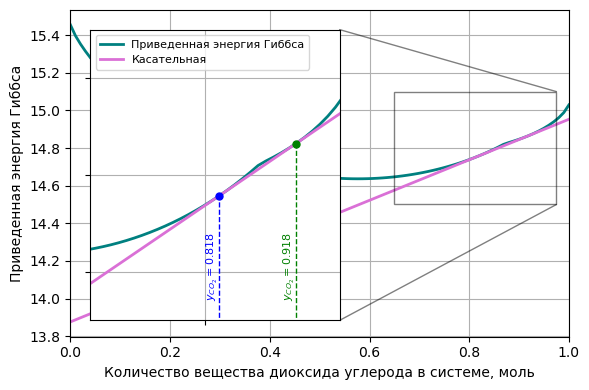

In [13]:
from matplotlib import pyplot as plt

fig1, ax1 = plt.subplots(1, 1, figsize=(6., 4.), tight_layout=True)
ax1.plot(yj1, Gj, lw=2., c='teal', zorder=2, label='Приведенная энергия Гиббса')
ax1.plot(yj1, Lj, lw=2., c='orchid', zorder=2, label='Касательная')
ax1.set_xlim(0., 1.)
ax1.set_xlabel('Количество вещества диоксида углерода в системе, моль')
ax1.set_ylabel('Приведенная энергия Гиббса')
ax1.grid(zorder=1)

axins1 = ax1.inset_axes([0.04, 0.05, 0.5, 0.89], xlim=(0.65, 0.975), ylim=(14.5, 15.1),
                        xticklabels=[], yticklabels=[])
ax1.indicate_inset_zoom(axins1, edgecolor='black')
axins1.plot(yj1, Gj, lw=2., c='teal', zorder=2, label='Приведенная энергия Гиббса')
axins1.plot(yj1, Lj, lw=2., c='orchid', zorder=2, label='Касательная')
axins1.plot(yvi[0], yvi.dot(lnfi), 'o', lw=0., mfc='blue', mec='blue', ms=5., zorder=3)
axins1.plot(yli[0], yli.dot(lnfi), 'o', lw=0., mfc='green', mec='green', ms=5., zorder=3)
axins1.plot([yvi[0], yvi[0]], [0., yvi.dot(lnfi)], '--', lw=1., c='blue', zorder=2)
axins1.plot([yli[0], yli[0]], [0., yli.dot(lnfi)], '--', lw=1., c='green', zorder=2)
axins1.text(0.8, 14.55, '$y_{CO_2} = 0.818$', fontsize=8, color='blue', rotation='vertical')
axins1.text(0.9, 14.55, '$y_{CO_2} = 0.918$', fontsize=8, color='green', rotation='vertical')
axins1.set_xticks([0.8])
axins1.set_yticks([14.6, 14.8, 15.0])
axins1.legend(loc=2, fontsize=8)
axins1.grid(zorder=1)

Из данного графика следует, что касательная, проведенная к функции энергии Гиббса в точке с компонентным составом первой фазы, не имеет пересечений с самой функцией, что подтверждает сделанный вывод о равновесности найденного состояния. Кроме того, можно отметить, что касательная имеет две точки касания, абсциссы которых соответствуют равновесным компонентным составам фаз, то есть функция энергии Гиббса имеет одинаковую касательную для каждого из компонентных составов, определяющих стационарное состояние. Это следует из равенства летучестей соответствующих компонентов в фазах, а полное доказательство данного утверждения было рассмотрено [ранее](SEC-1-Stability.md).

Таким образом, метод последовательных подстановок может быть использован для определения равновесного состояния системы. Недостатком данного метода является большое количество итераций, необходимых для нахождения решения. Существует множество работ, посвященных "ускорению" метода последовательных подстановок. Так, например, в работе \[[Nghiem and Li, 1984](https://doi.org/10.1016/0378-3812(84)80013-8)\] предлагается использовать *quasi-Newton succesive substitution (QNSS)* для поиска равновесного состояния. Реализация данного метода представлена [здесь](https://github.com/DanielSkorov/ReservoirSimulation/blob/main/_src/flash.py).

На примере, представленном выше, было рассмотрено применение метода последовательных подстановок для расчета равновесного состояния в двухфазной постановке. Однако этот метод может применяться и для многофазного случая. Рассмотрим следующий пример.

```{admonition} Пример
:class: exercise
Пусть имеется $1 \; моль$ смеси из метана, гексана и воды при температуре $20 \; ^{\circ} C$ и давлении $1 \; атм$ с мольными долями компонентов $0.3, \, 0.4, \, 0.3$ соответственно. Необходимо определить равновесное состояние системы.
```


(pvt-esc-equilibrium-vt)=
## VT-термодинамика